In [1]:
%matplotlib notebook
import pandas as pd

In [2]:
feature_dir = 'data/features/'

In [3]:
df_twitter = pd.read_csv(feature_dir+'twitter_features.csv', parse_dates = ['Date'])
df_news = pd.read_csv(feature_dir+'news_features.csv', parse_dates = ['Date'])
df_out= pd.read_csv(feature_dir+'index_features.csv', parse_dates = ['Date'])
df_stocks= pd.read_csv(feature_dir+'stock_features.csv', parse_dates = ['Date'])

In [4]:
df = pd.merge(df_out, df_twitter, how='left', on='Date')
df2 = pd.merge(df_out, df_news, how='left', on='Date')
df3 = pd.merge(df, df_news, how='left', on='Date')

In [5]:
df_out

,Date,Change VIX,Direction VIX,Lag 1 Change VIX,Lag 1 Direction VIX,Lag 2 Change VIX,Lag 2 Direction VIX,Lag 2 Significant VIX,Lag 5 Change VIX,Lag 5 Direction VIX,Change SPY,Direction SPY,Lag 1 Change SPY,Lag 1 Direction SPY,Lag 2 Change SPY,Lag 2 Direction SPY,Lag 2 Significant SPY,Lag 5 Change SPY,Lag 5 Direction SPY
0,2015-01-02,0.116279,1,0.080518,1,0.144707,1,1,0.144707,1,-0.007741,-1,-0.010708,-1,-0.020787,-1,-1,-0.020787,-1
1,2015-01-05,0.080518,1,0.059406,1,0.050026,1,1,0.050026,1,-0.010708,-1,-0.010188,-1,-0.013469,-1,-1,-0.013469,-1
2,2015-01-06,0.059406,1,-0.008854,-1,-0.118052,-1,-1,-0.118052,-1,-0.010188,-1,-0.003315,-1,0.009501,1,0,0.009501,1
3,2015-01-07,-0.008854,-1,-0.110174,-1,-0.184119,-1,-1,-0.184119,-1,-0.003315,-1,0.012859,1,0.024724,1,1,0.024724,1
4,2015-01-08,-0.110174,-1,-0.083101,-1,0.005020,1,0,0.005020,1,0.012859,1,0.011715,1,0.001961,1,0,0.001961,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,2019-04-24,-0.010269,-1,0.060654,1,0.072626,1,1,0.072626,1,0.007259,1,-0.002288,-1,-0.002357,-1,0,-0.002357,-1
1084,2019-04-25,0.060654,1,0.011287,1,-0.018811,-1,-1,-0.018811,-1,-0.002288,-1,-0.000068,-1,0.004758,1,0,0.004758,1
1085,2019-04-26,0.011287,1,-0.029762,-1,-0.024554,-1,-1,-0.024554,-1,-0.000068,-1,0.004827,1,0.004759,1,0,0.004759,1
1086,2019-04-29,-0.029762,-1,0.005368,1,-0.013804,-1,-1,-0.013804,-1,0.004827,1,-0.000068,-1,0.004123,1,0,0.004123,1


In [6]:
df.corr()

,Change VIX,Direction VIX,Lag 1 Change VIX,Lag 1 Direction VIX,Lag 2 Change VIX,Lag 2 Direction VIX,Lag 2 Significant VIX,Lag 5 Change VIX,Lag 5 Direction VIX,Change SPY,...,Lag 5 Change SPY,Lag 5 Direction SPY,BarackObama_sentiment_score,BarackObama_heuristic_score,cnnbrk_sentiment_score,cnnbrk_heuristic_score,KimKardashian_sentiment_score,KimKardashian_heuristic_score,Trump_sentiment_score,Trump_heuristic_score
Change VIX,1.000000,0.683691,-0.010369,-0.049064,-0.050161,-0.059096,-0.068255,-0.050161,-0.059096,-0.723268,...,0.025854,0.002688,0.049776,0.057714,0.060333,-0.002724,0.054934,-0.000255,-0.012823,-0.027439
Direction VIX,0.683691,1.000000,0.007682,-0.035060,-0.004167,-0.021556,-0.042556,-0.004167,-0.021556,-0.519612,...,-0.014154,-0.007327,0.077815,0.089092,0.135524,0.066734,0.038437,-0.025037,0.007996,-0.010284
Lag 1 Change VIX,-0.010369,0.007682,1.000000,0.683222,0.666871,0.482719,0.503227,0.666871,0.482719,-0.018798,...,-0.523874,-0.396535,-0.022770,-0.041622,0.216035,0.179156,0.034449,0.008283,0.031301,0.034010
Lag 1 Direction VIX,-0.049064,-0.035060,0.683222,1.000000,0.474392,0.493357,0.507301,0.474392,0.493357,0.022925,...,-0.396404,-0.360612,0.007141,-0.013211,0.186347,0.215535,0.081666,0.052798,0.071162,0.067424
Lag 2 Change VIX,-0.050161,-0.004167,0.666871,0.474392,1.000000,0.665362,0.693357,1.000000,0.665362,0.035940,...,-0.756132,-0.534772,-0.040341,-0.052689,0.238722,0.180363,-0.042428,-0.072578,0.030984,0.023544
Lag 2 Direction VIX,-0.059096,-0.021556,0.482719,0.493357,0.665362,1.000000,0.952838,0.665362,1.000000,0.057515,...,-0.543058,-0.551978,0.066232,0.025877,0.244185,0.202971,-0.019136,-0.069362,-0.004445,-0.006170
Lag 2 Significant VIX,-0.068255,-0.042556,0.503227,0.507301,0.693357,0.952838,1.000000,0.693357,0.952838,0.059071,...,-0.563856,-0.577289,0.059225,0.032348,0.266908,0.237503,-0.030220,-0.080817,0.025615,0.022153
Lag 5 Change VIX,-0.050161,-0.004167,0.666871,0.474392,1.000000,0.665362,0.693357,1.000000,0.665362,0.035940,...,-0.756132,-0.534772,-0.040341,-0.052689,0.238722,0.180363,-0.042428,-0.072578,0.030984,0.023544
Lag 5 Direction VIX,-0.059096,-0.021556,0.482719,0.493357,0.665362,1.000000,0.952838,0.665362,1.000000,0.057515,...,-0.543058,-0.551978,0.066232,0.025877,0.244185,0.202971,-0.019136,-0.069362,-0.004445,-0.006170
Change SPY,-0.723268,-0.519612,-0.018798,0.022925,0.035940,0.057515,0.059071,0.035940,0.057515,1.000000,...,-0.066513,-0.017547,-0.042465,-0.053343,0.044797,0.081450,-0.074301,-0.029066,-0.012880,0.008491


In [7]:
df2.corr()

,Change VIX,Direction VIX,Lag 1 Change VIX,Lag 1 Direction VIX,Lag 2 Change VIX,Lag 2 Direction VIX,Lag 2 Significant VIX,Lag 5 Change VIX,Lag 5 Direction VIX,Change SPY,...,Lag 5 Change SPY,Lag 5 Direction SPY,New York Times_sentiment_score,New York Times_polar_score,CNN_sentiment_score,CNN_polar_score,Washington Post_sentiment_score,Washington Post_polar_score,NYT_sentiment_score,NYT_polar_score
Change VIX,1.000000,0.683691,-0.010369,-0.049064,-0.050161,-0.059096,-0.068255,-0.050161,-0.059096,-0.723268,...,0.025854,0.002688,-0.029699,0.001303,-0.020658,-0.022571,0.033266,0.042201,0.019971,0.015603
Direction VIX,0.683691,1.000000,0.007682,-0.035060,-0.004167,-0.021556,-0.042556,-0.004167,-0.021556,-0.519612,...,-0.014154,-0.007327,-0.050885,-0.030514,-0.036514,-0.050276,0.036768,0.030535,0.019973,-0.006797
Lag 1 Change VIX,-0.010369,0.007682,1.000000,0.683222,0.666871,0.482719,0.503227,0.666871,0.482719,-0.018798,...,-0.523874,-0.396535,0.011715,0.030476,0.015952,0.022946,-0.073934,-0.076737,-0.050046,0.015313
Lag 1 Direction VIX,-0.049064,-0.035060,0.683222,1.000000,0.474392,0.493357,0.507301,0.474392,0.493357,0.022925,...,-0.396404,-0.360612,-0.003880,-0.005880,-0.033330,-0.035752,-0.061379,-0.047808,-0.024817,0.040359
Lag 2 Change VIX,-0.050161,-0.004167,0.666871,0.474392,1.000000,0.665362,0.693357,1.000000,0.665362,0.035940,...,-0.756132,-0.534772,-0.022961,-0.012564,0.061025,0.047893,-0.109885,-0.119015,-0.027483,-0.005194
Lag 2 Direction VIX,-0.059096,-0.021556,0.482719,0.493357,0.665362,1.000000,0.952838,0.665362,1.000000,0.057515,...,-0.543058,-0.551978,-0.066622,-0.034046,-0.011549,-0.017380,-0.078219,-0.056737,-0.012681,-0.005360
Lag 2 Significant VIX,-0.068255,-0.042556,0.503227,0.507301,0.693357,0.952838,1.000000,0.693357,0.952838,0.059071,...,-0.563856,-0.577289,-0.055086,-0.028104,0.010423,0.004017,-0.089570,-0.070333,-0.019685,-0.001434
Lag 5 Change VIX,-0.050161,-0.004167,0.666871,0.474392,1.000000,0.665362,0.693357,1.000000,0.665362,0.035940,...,-0.756132,-0.534772,-0.022961,-0.012564,0.061025,0.047893,-0.109885,-0.119015,-0.027483,-0.005194
Lag 5 Direction VIX,-0.059096,-0.021556,0.482719,0.493357,0.665362,1.000000,0.952838,0.665362,1.000000,0.057515,...,-0.543058,-0.551978,-0.066622,-0.034046,-0.011549,-0.017380,-0.078219,-0.056737,-0.012681,-0.005360
Change SPY,-0.723268,-0.519612,-0.018798,0.022925,0.035940,0.057515,0.059071,0.035940,0.057515,1.000000,...,-0.066513,-0.017547,0.078483,0.056370,0.038493,0.036811,-0.029271,-0.032495,0.012809,-0.043829


In [283]:
df3.fillna(0, inplace=True)

In [10]:
df3.corr()

,Change VIX,Direction VIX,Lag 1 Change VIX,Lag 1 Direction VIX,Lag 2 Change VIX,Lag 2 Direction VIX,Lag 2 Significant VIX,Lag 5 Change VIX,Lag 5 Direction VIX,Change SPY,...,Trump_sentiment_score,Trump_heuristic_score,New York Times_sentiment_score,New York Times_polar_score,CNN_sentiment_score,CNN_polar_score,Washington Post_sentiment_score,Washington Post_polar_score,NYT_sentiment_score,NYT_polar_score
Change VIX,1.000000,0.683691,-0.010369,-0.049064,-0.050161,-0.059096,-0.068255,-0.050161,-0.059096,-0.723268,...,-0.012823,-0.027439,-0.029699,0.001303,-0.020658,-0.022571,0.033266,0.042201,0.019971,0.015603
Direction VIX,0.683691,1.000000,0.007682,-0.035060,-0.004167,-0.021556,-0.042556,-0.004167,-0.021556,-0.519612,...,0.007996,-0.010284,-0.050885,-0.030514,-0.036514,-0.050276,0.036768,0.030535,0.019973,-0.006797
Lag 1 Change VIX,-0.010369,0.007682,1.000000,0.683222,0.666871,0.482719,0.503227,0.666871,0.482719,-0.018798,...,0.031301,0.034010,0.011715,0.030476,0.015952,0.022946,-0.073934,-0.076737,-0.050046,0.015313
Lag 1 Direction VIX,-0.049064,-0.035060,0.683222,1.000000,0.474392,0.493357,0.507301,0.474392,0.493357,0.022925,...,0.071162,0.067424,-0.003880,-0.005880,-0.033330,-0.035752,-0.061379,-0.047808,-0.024817,0.040359
Lag 2 Change VIX,-0.050161,-0.004167,0.666871,0.474392,1.000000,0.665362,0.693357,1.000000,0.665362,0.035940,...,0.030984,0.023544,-0.022961,-0.012564,0.061025,0.047893,-0.109885,-0.119015,-0.027483,-0.005194
Lag 2 Direction VIX,-0.059096,-0.021556,0.482719,0.493357,0.665362,1.000000,0.952838,0.665362,1.000000,0.057515,...,-0.004445,-0.006170,-0.066622,-0.034046,-0.011549,-0.017380,-0.078219,-0.056737,-0.012681,-0.005360
Lag 2 Significant VIX,-0.068255,-0.042556,0.503227,0.507301,0.693357,0.952838,1.000000,0.693357,0.952838,0.059071,...,0.025615,0.022153,-0.055086,-0.028104,0.010423,0.004017,-0.089570,-0.070333,-0.019685,-0.001434
Lag 5 Change VIX,-0.050161,-0.004167,0.666871,0.474392,1.000000,0.665362,0.693357,1.000000,0.665362,0.035940,...,0.030984,0.023544,-0.022961,-0.012564,0.061025,0.047893,-0.109885,-0.119015,-0.027483,-0.005194
Lag 5 Direction VIX,-0.059096,-0.021556,0.482719,0.493357,0.665362,1.000000,0.952838,0.665362,1.000000,0.057515,...,-0.004445,-0.006170,-0.066622,-0.034046,-0.011549,-0.017380,-0.078219,-0.056737,-0.012681,-0.005360
Change SPY,-0.723268,-0.519612,-0.018798,0.022925,0.035940,0.057515,0.059071,0.035940,0.057515,1.000000,...,-0.012880,0.008491,0.078483,0.056370,0.038493,0.036811,-0.029271,-0.032495,0.012809,-0.043829


In [12]:
df4 = df3[['Change VIX', 'Direction VIX', 'Lag 1 Change VIX', 'Lag 1 Direction VIX', 'Lag 2 Change VIX', 'Lag 2 Direction VIX', 'Lag 2 Significant VIX', 'Lag 5 Change VIX', 'Lag 5 Direction VIX', 'BarackObama_sentiment_score', 'cnnbrk_sentiment_score', 'KimKardashian_sentiment_score', 'Trump_sentiment_score', 'New York Times_sentiment_score', 'CNN_sentiment_score', 'Washington Post_sentiment_score', 'NYT_sentiment_score']]
df4.corr()

,Change VIX,Direction VIX,Lag 1 Change VIX,Lag 1 Direction VIX,Lag 2 Change VIX,Lag 2 Direction VIX,Lag 2 Significant VIX,Lag 5 Change VIX,Lag 5 Direction VIX,BarackObama_sentiment_score,cnnbrk_sentiment_score,KimKardashian_sentiment_score,Trump_sentiment_score,New York Times_sentiment_score,CNN_sentiment_score,Washington Post_sentiment_score,NYT_sentiment_score
Change VIX,1.000000,0.683691,-0.010369,-0.049064,-0.050161,-0.059096,-0.068255,-0.050161,-0.059096,0.049776,0.060333,0.054934,-0.012823,-0.029699,-0.020658,0.033266,0.019971
Direction VIX,0.683691,1.000000,0.007682,-0.035060,-0.004167,-0.021556,-0.042556,-0.004167,-0.021556,0.077815,0.135524,0.038437,0.007996,-0.050885,-0.036514,0.036768,0.019973
Lag 1 Change VIX,-0.010369,0.007682,1.000000,0.683222,0.666871,0.482719,0.503227,0.666871,0.482719,-0.022770,0.216035,0.034449,0.031301,0.011715,0.015952,-0.073934,-0.050046
Lag 1 Direction VIX,-0.049064,-0.035060,0.683222,1.000000,0.474392,0.493357,0.507301,0.474392,0.493357,0.007141,0.186347,0.081666,0.071162,-0.003880,-0.033330,-0.061379,-0.024817
Lag 2 Change VIX,-0.050161,-0.004167,0.666871,0.474392,1.000000,0.665362,0.693357,1.000000,0.665362,-0.040341,0.238722,-0.042428,0.030984,-0.022961,0.061025,-0.109885,-0.027483
Lag 2 Direction VIX,-0.059096,-0.021556,0.482719,0.493357,0.665362,1.000000,0.952838,0.665362,1.000000,0.066232,0.244185,-0.019136,-0.004445,-0.066622,-0.011549,-0.078219,-0.012681
Lag 2 Significant VIX,-0.068255,-0.042556,0.503227,0.507301,0.693357,0.952838,1.000000,0.693357,0.952838,0.059225,0.266908,-0.030220,0.025615,-0.055086,0.010423,-0.089570,-0.019685
Lag 5 Change VIX,-0.050161,-0.004167,0.666871,0.474392,1.000000,0.665362,0.693357,1.000000,0.665362,-0.040341,0.238722,-0.042428,0.030984,-0.022961,0.061025,-0.109885,-0.027483
Lag 5 Direction VIX,-0.059096,-0.021556,0.482719,0.493357,0.665362,1.000000,0.952838,0.665362,1.000000,0.066232,0.244185,-0.019136,-0.004445,-0.066622,-0.011549,-0.078219,-0.012681
BarackObama_sentiment_score,0.049776,0.077815,-0.022770,0.007141,-0.040341,0.066232,0.059225,-0.040341,0.066232,1.000000,-0.120768,0.033132,-0.098913,0.005341,-0.023309,-0.126836,0.025666


In [285]:
df3.corr().to_csv('Corr.csv')

In [304]:
magic_dfs = []
for i in range(2015,2019):
    first_date = pd.to_datetime('1/1/'+str(i))
    last_date = pd.to_datetime('1/1/'+str(i+1))
    df = df3[df3['Date']>first_date]
    df = df[df['Date']<last_date]
    magic_dfs.append(df)

In [305]:
import matplotlib.pyplot as plt


In [307]:
len(magic_dfs)

4

<IPython.core.display.Javascript object>


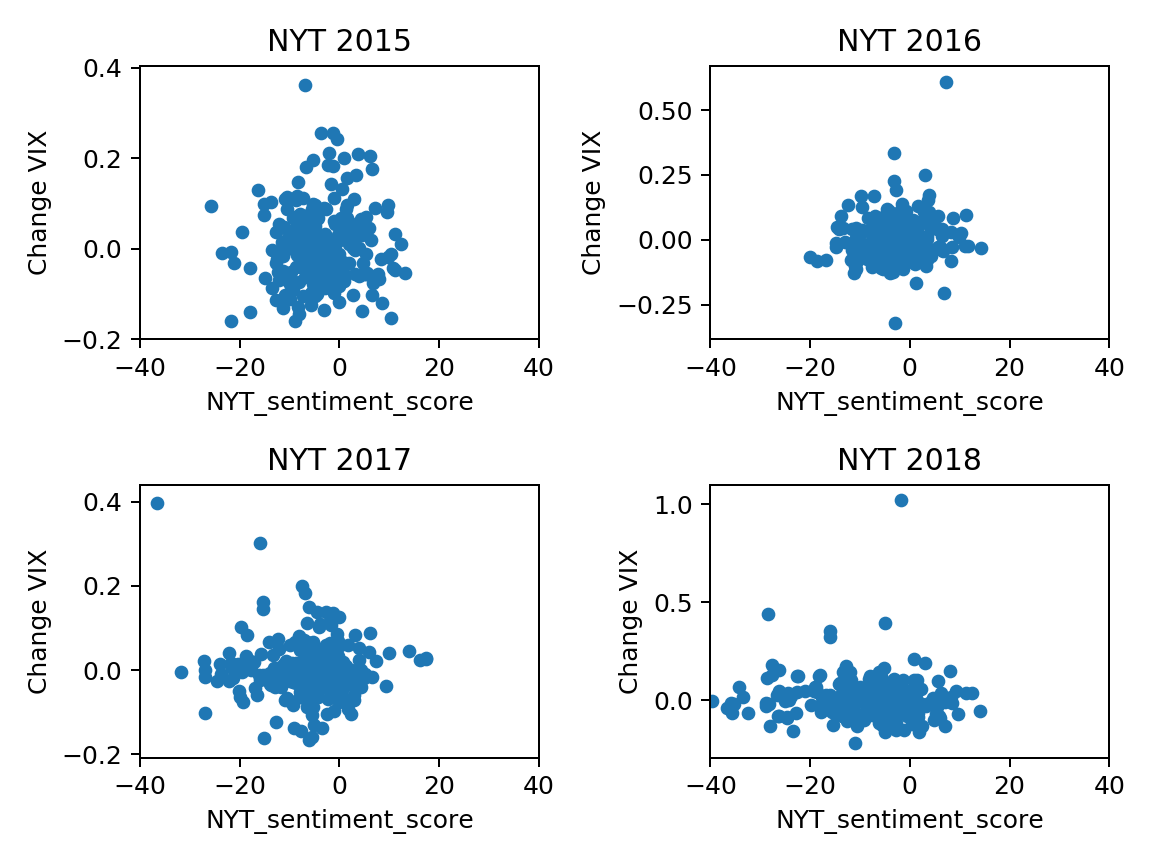

In [312]:
fig = plt.figure(1)
counter=2015
for df in magic_dfs:
    plt.subplot(2,2,counter-2014)
    df.plot(ax=plt.gca(), x='NYT_sentiment_score', y='Change VIX', kind='scatter', title='NYT '+str(counter), xlim=(-40,40))
    counter+=1
fig.tight_layout()

<IPython.core.display.Javascript object>


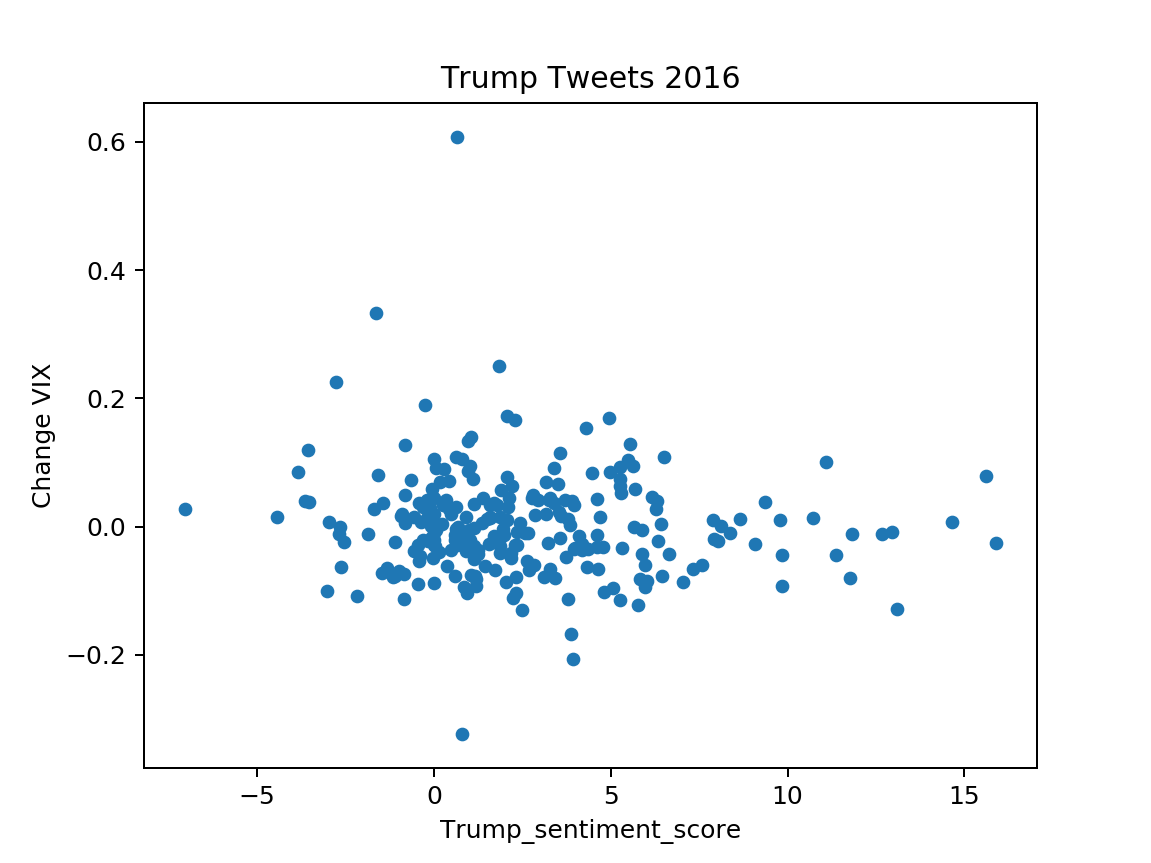

In [293]:
df_short.plot(x='Trump_sentiment_score', y='Change VIX', kind='scatter', title='Trump Tweets 2016')

<IPython.core.display.Javascript object>


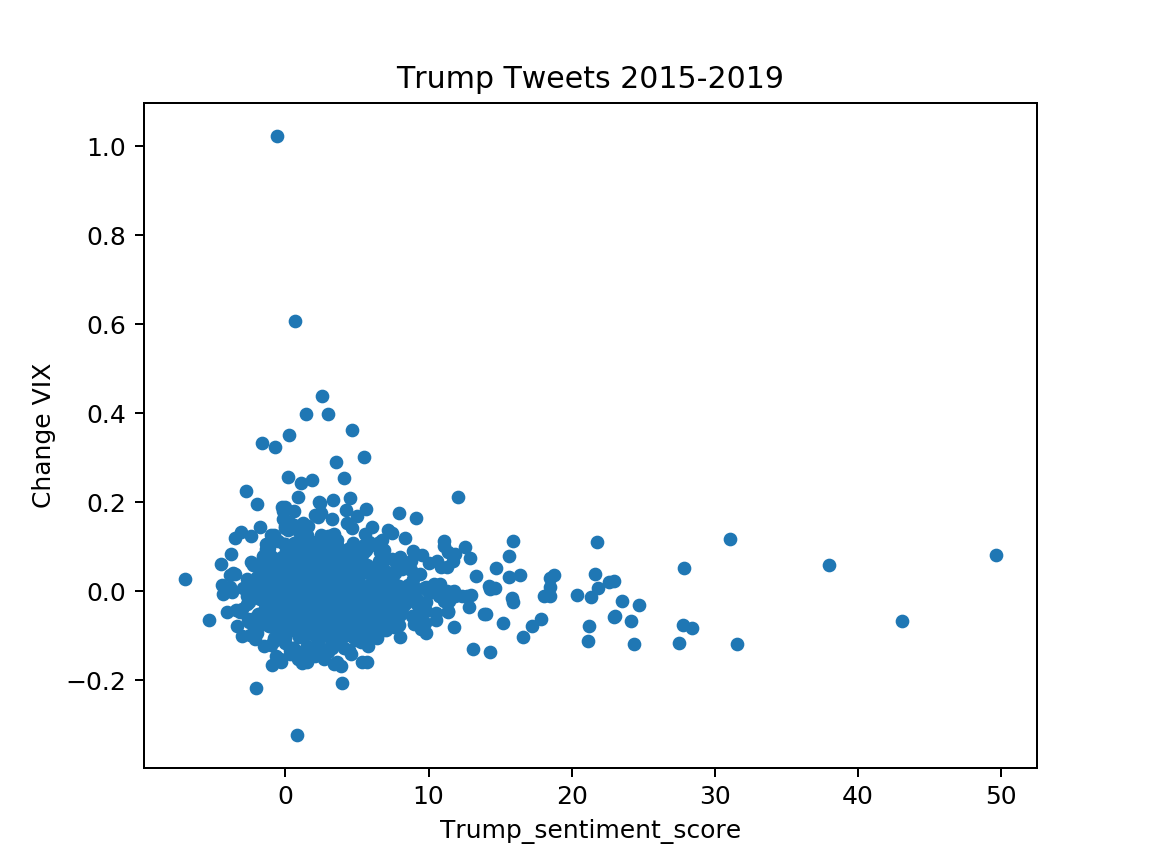

In [291]:
df3.plot(x='Trump_sentiment_score', y='Change VIX', kind='scatter', title='Trump Tweets 2015-2019')

In [ ]:
df_short.plot(x='Trump_sentiment_score', y='Change VIX', kind='scatter', title='Trump Tweets 2016')